In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Definición de la red de transporte
grafo = nx.Graph()

In [3]:
# Añadir estaciones/paradas como nodos
estaciones = {
    "Estación A": "A",
    "Estación B": "B",
    "Estación C": "C",
    "Estación D": "D",
    "Estación E": "E",
    "Estación F": "F",  # Nueva estación agregada
}

for nombre, id in estaciones.items():
    grafo.add_node(id)

In [10]:
# Cambio en los tiempos y costos de algunas rutas
rutas = {
    ("A", "B"): {"tiempo": 8, "costo": 3000},
    ("A", "C"): {"tiempo": 12, "costo": 2000},
    ("B", "C"): {"tiempo": 6, "costo": 2000},
    ("B", "D"): {"tiempo": 12, "costo": 3000},
    ("C", "D"): {"tiempo": 18, "costo": 5000},
    ("C", "E"): {"tiempo": 15, "costo": 3000},
    ("D", "E"): {"tiempo": 5, "costo": 10000},
    ("D", "F"): {"tiempo": 8, "costo": 20000},  # Nueva ruta agregada
    ("F", "E"): {"tiempo": 10, "costo": 20000},  # Nueva ruta agregada
}

for origen, destino in rutas.keys():
    tiempo, costo = rutas[(origen, destino)].values()
    grafo.add_edge(origen, destino, tiempo=tiempo, costo=costo)

In [11]:
# Función para calcular la ruta más rápida
def encontrar_ruta_rapida(origen, destino):
    ruta = nx.shortest_path(grafo, origen, destino, weight="tiempo")
    return ruta, calcular_costo_ruta(ruta)

In [12]:
# Función para calcular el costo total de una ruta
def calcular_costo_ruta(ruta):
    costo_total = 0
    for i in range(len(ruta) - 1):
        costo_total += grafo.edges[ruta[i], ruta[i + 1]]["costo"]
    return costo_total


In [13]:
# Ejemplo de uso
origen = "A"
destino = "F"

ruta, costo = encontrar_ruta_rapida(origen, destino)

print(f"Ruta más rápida: {ruta}")
print(f"Tiempo total: {sum(grafo.edges[u, v]['tiempo'] for u, v in zip(ruta, ruta[1:]))} minutos")
print(f"Costo total: {costo} pesos")

Ruta más rápida: ['A', 'B', 'D', 'F']
Tiempo total: 28 minutos
Costo total: 26000 pesos


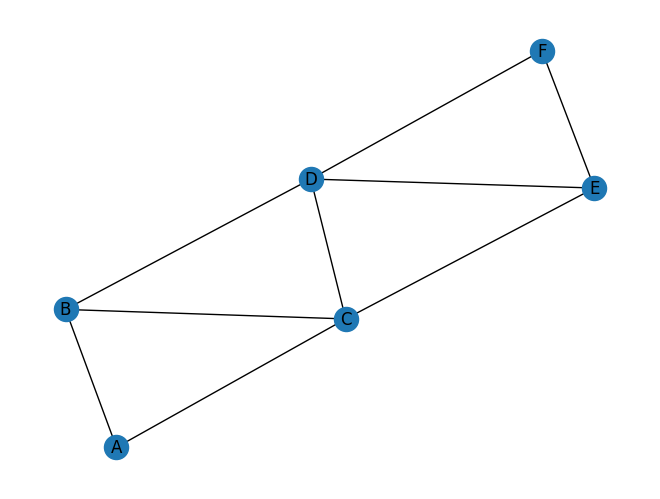

In [14]:
# Visualización de la red (opcional)
nx.draw(grafo, with_labels=True)
plt.show()